# Boston Housing Prices

### Libraries

In [43]:
import numpy as np # For numerical calculations
import statistics
import matplotlib.pyplot as plt #For graphical representations
import seaborn as sns #For graphical representations
import pandas as pd #For data manipulation
import scipy.stats as ss # For calculating skew
%matplotlib inline

## Introduction

The Boston Housing dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Massachusetts.


The data was originally published by Harrison, D. and Rubinfeld, D.L. in their study of `Hedonic prices and the demand for clean air' in 1978.

### The Dataset

The Boston dataset has 506 rows and 14 columns. This data frame contains the following columns:

- **crim:** per capita crime rate by town.
- **zn:** proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus:** proportion of non-retail business acres per town.
- **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **nox:** nitrogen oxides concentration (parts per 10 million).
- **rm:** average number of rooms per dwelling.
- **age:** proportion of owner-occupied units built prior to 1940.
- **dis:** weighted mean of distances to five Boston employment centres.
- **rad:** index of accessibility to radial highways.

- **tax:** full-value property-tax rate per \$10000 dollars.
- **ptratio:** pupil-teacher ratio by town.
- **black:** $1000(Bk - 0.63)^{2}$ where Bk is the proportion of blacks by town.
- **lstat:** lower status of the population (percent).
- **medv:** median value of owner-occupied homes in \$1000s.

### Project Plan

- Describe the dataset, and investigate the summary statistics for each category (column).
- Identify correlation between different categories by graphing the data and calculating relevant statisical measures. 
- Use summary statistic to see if there is a relationship between median house values in properties along the Charles River.
- Analysis and prediction of house prices based on different factors.


## Summary Statistics

In [2]:
df = pd.read_csv('data/houses.csv')
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Fortunately all categories contain 506 datapoints meaning we have no missing data.

The **medv** or median value of properties has a smaller range of values than I initially expected. This is probably as a result of the data been collected in the seventies. Properties range in value from \$5000 to \$50000, and this category has similar mean and median values, implying that there are no extreme values or outliers. 

The **crim** or per capita crime rate by town is a different story, with a huge range and a mean that is 14 times larger than the median value. This implies that there are a number of outliers in this category and they are very large values. This becomes obvious when we plot crime against median value. There are a number of outliers, but it is interesting to note that these properties in towns with a larger crime rate, have a lower median value.

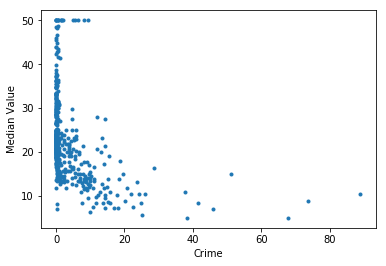

In [7]:
plt.plot(df['crim'], df['medv'], '.')
plt.xlabel('Crime')
plt.ylabel('Median Value');

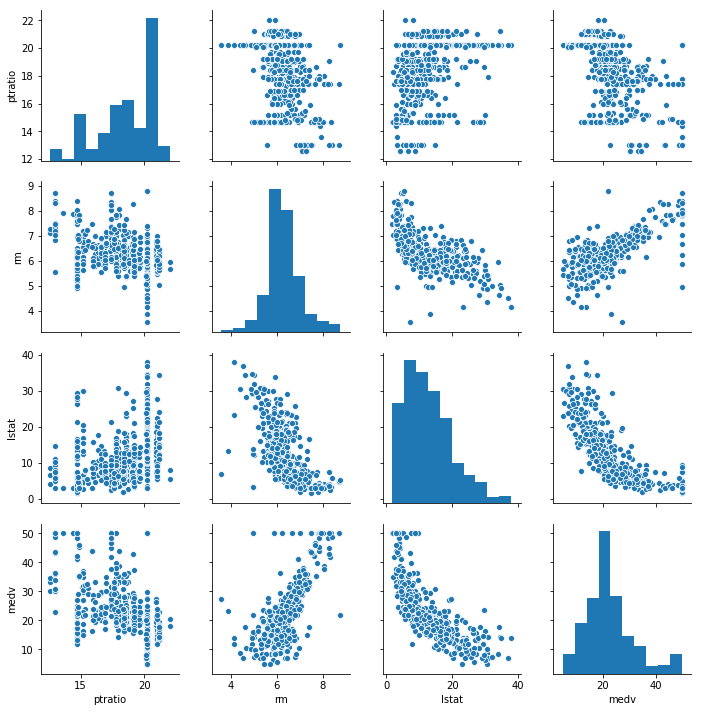

In [16]:
sns.pairplot(df[['ptratio', 'rm', 'lstat', 'medv']]);

- Properties with an average or above average number of rooms appear are more likely to have a higher median value. 
- Properties in areas with a higher proportion of lower status people appear to have a below average value. 

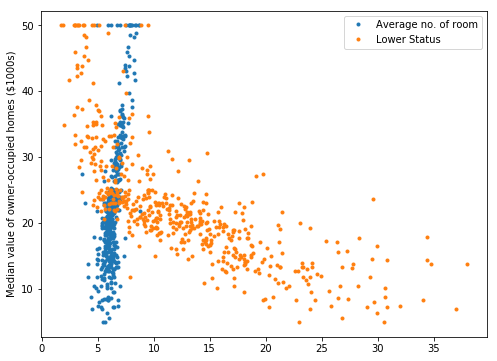

In [12]:
plt.figure(figsize = (8, 6))
plt.ylabel('Median value of owner-occupied homes ($1000s)')
lineObjects = plt.plot(df[['rm', 'lstat']], df['medv'], '.')
plt.legend(iter(lineObjects), ('Average no. of room', 'Lower Status'));

My only discrete variable are chas (variable identifying houses along the Charles River) and rad (the index of accessbility to radial highways).

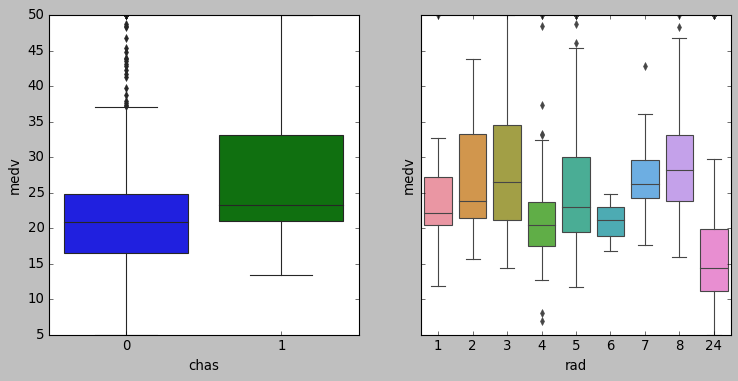

In [5]:
f, axes = plt.subplots(1, 2, figsize = (11, 5), sharey=True)
sns.boxplot(x = 'chas', y = 'medv', data =df, orient='v', ax=axes[0])
sns.boxplot(x = 'rad', y = 'medv', data =df, orient='v', ax=axes[1])
plt.show()

## Identifying Correlation

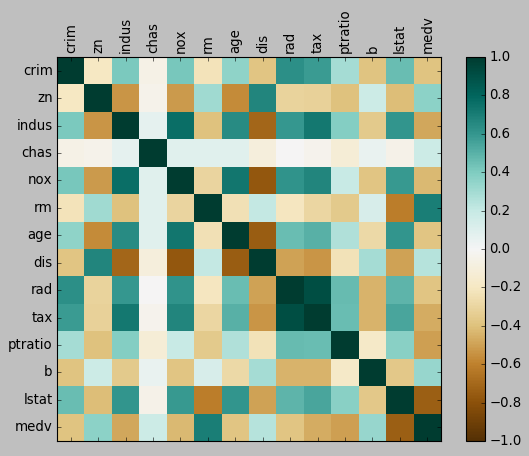

In [16]:
#Adapted from 
#https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3
corr = df.corr()#Set corr to be 
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='BrBG', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

From the map above, it's obvious that the rm and lstat are good indicators of values, as predicted. This is verified when I calculate the summary statistics.

In [14]:
#Returns table with correlation coefficients for all variables
corr = df.corr(method = 'pearson')
#Return medv column only
corr['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

In [15]:
r2 = corr**2
r2['medv']

crim       0.150780
zn         0.129921
indus      0.233990
chas       0.030716
nox        0.182603
rm         0.483525
age        0.142095
dis        0.062464
rad        0.145639
tax        0.219526
ptratio    0.257847
b          0.111196
lstat      0.544146
medv       1.000000
Name: medv, dtype: float64

- As expected the average number of rooms positively impacts median house value, with a significant correlation coefficient
- The proportion of the population defined as lower status negatively impacts median house value, and is the most significant factor impacting value. 
- There actually appears to be very little correlation between crime and median house value.
- Indus, nox, tax, and pupil teacher ratio are all have greater evidence of correlation with median house prices, than the proportion of crime in the area.
- That been said they're not as significant as either the number of rooms or status of the population. 
- However the correlation coefficient estimates the linear relationship between variables, and although crime has very little linear correlation with median value, I can still observe a relationship between higher crime rates and lower median value.

## Charles River

The Charles River dummy value (**chas**) tells us if a property is located along the Charles River. This variable is either 1 (along the river) or 0 (not along the river). It's obvious from looking at the frequncy of results, there are a very small number of properties in this dataset that are along the Charles River. 

In [18]:
np.bincount(df['chas'])

array([471,  35], dtype=int64)

Only 35 out of 506 properties are located along the river, but from an initial look at the mean and median values it appears that their location may have a positive impact on property values.

In [53]:
onChas = df.loc[df['chas']==1]
print('Properties along Charles River')
print('Mean value: ', np.mean(onChas['medv']))
print('Median value: ', statistics.median(onChas['medv']))

Properties along Charles River
Mean value:  28.44
Median value:  23.3


In [56]:
notOnChas = df.loc[df['chas']==0]
print('Properties NOT along Charles River')
print('Mean value: ', np.round(np.mean(notOnChas['medv']), 2))
print('Median value: ', statistics.median(notOnChas['medv']))

Properties NOT along Charles River
Mean value:  22.09
Median value:  20.9


However attempts to fit poylnomials of different degrees to this data failed to find any relevant regression.

In [10]:
crime=df['crim']
val=df['medv']

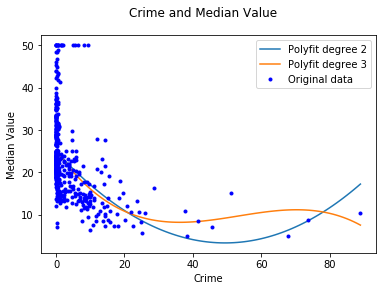

In [13]:
plt.figure()
x = np.arange(90)
[r, s, t] =np.polyfit(crime, val, 2)
y2 = r*x*x +s*x +t
plt.plot(x, y2, label = 'Polyfit degree 2')


[m, n, o, p] =np.polyfit(crime, val, 3)
y3 = m*x*x*x +n*x*x + o*x +p
plt.plot(x, y3, label = 'Polyfit degree 3')



plt.plot(crime, val, 'b.', label = 'Original data')

plt.suptitle('Crime and Median Value')
plt.xlabel('Crime')
plt.ylabel('Median Value')
plt.legend();

 This may be because an exponential regression would best fit the data. But for the moment, I'm going to disregard crime as a factor influencing house values. 

## What adds value to your home?

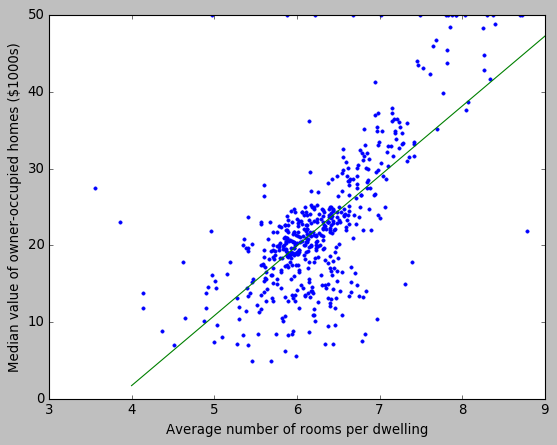

In [12]:
plt.figure(figsize = (8, 6))
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes ($1000s)');

[m,c] = np.polyfit(df['rm'], df['medv'], 1)
x = np.arange(4, 10)
y = m*x +c
plt.plot(df['rm'], df['medv'], '.')
plt.plot(x, y);

## Other investigations

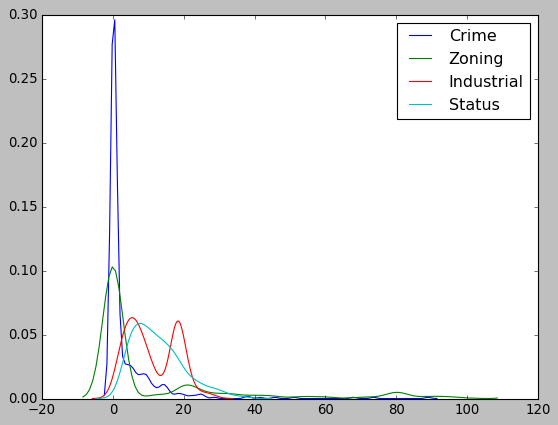

In [18]:
f, ax = plt.subplots()
ax = sns.distplot(df['crim'], ax=ax,
             hist=False, label ='Crime');

sns.distplot(df['zn'], ax=ax,
             hist=False, label ='Zoning');
sns.distplot(df['indus'], ax=ax,
             hist=False, label ='Industrial');
sns.distplot(df['lstat'], ax=ax,
             hist=False, label ='Status');
ax.legend()
ax.set_xlabel(None);

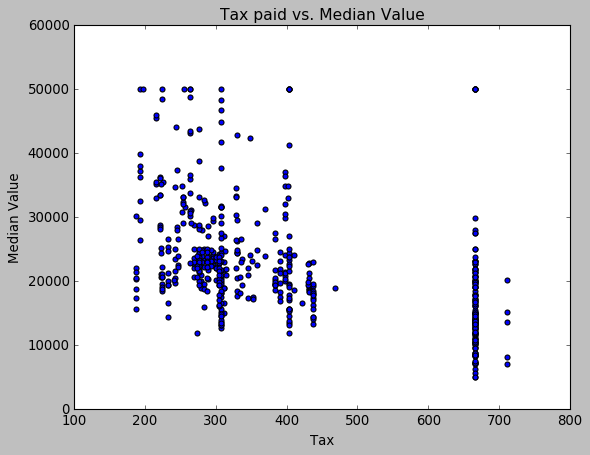

In [19]:
tax = df['tax']
value = df['medv']*1000
plt.title('Tax paid vs. Median Value', fontsize = 14)
plt.xlabel('Tax')
plt.ylabel('Median Value')
plt.scatter(tax, value);

## References


- [About the Boston Dataset, Delve Project at www.cs.toronto.edu](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)